In [1]:
# GRAVIMETER: FIGURE 3.2 and 3.3

# Lunar Leaper: Gravimetry Modelling
# Yara Luginbühl

# Input: Parameters from Excel (ConOps.xslx), Data/Simulation2_Results.csv, DifferentRadii.csv
# Output: ConOpsPlot5060.png, misfit5060.png, Characterisation.png

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import detrend

from ModelFunction import LavaTubeGravimetry

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns

import matplotlib.colors as mcolors
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm



No module named 'trame'.
You need to install this optional dependency to use interactive 3D visualizations within Jupyter notebooks.


Text(0.5, 1.0, 'Teperatures Over Days')

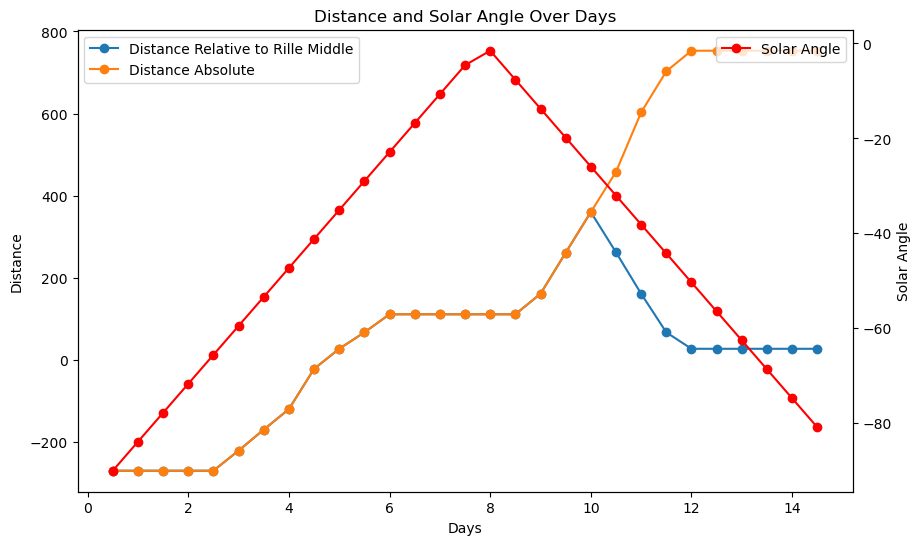

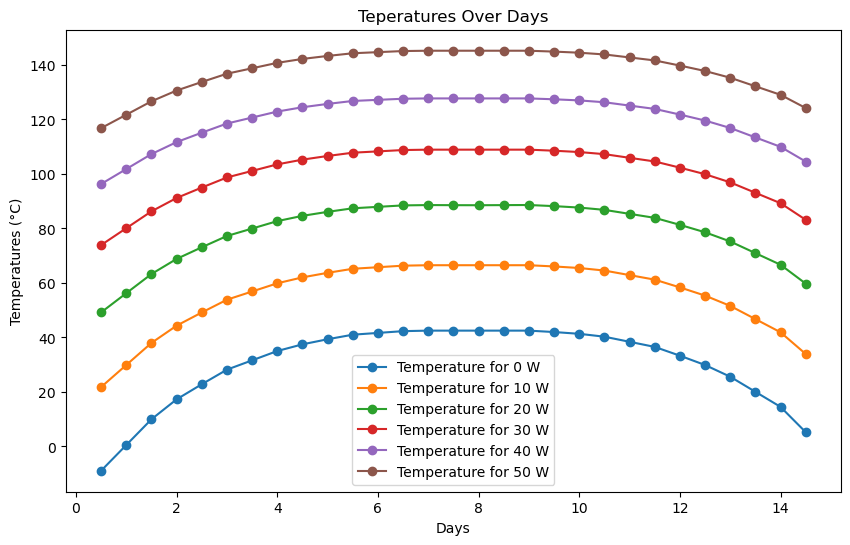

In [3]:
# CONOPS

# From conops table:
days = np.arange(0.5, 15,0.5)
distance_reltorillemiddle = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360, 262, 161, 67, 27, 27, 27, 27, 27, 27
])

distance_abs = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360, 458, 603, 703, 753, 753, 753, 753, 753, 753,
])

# WIDTH OF RILLE = 420 from -210 to 210 crosesd between day 3 and 3.5 and day 9 and 9.5 as well as 10.5 and 11
start = -90
step = (360/29.5)/2 # degrees per half an earth day
solar_angle = np.array([start + step * i for i in range(len(days))])

# since nicks table does not differentiate between -90 and 90 grad etc. 
solar_angle = -np.abs(solar_angle)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(days, distance_reltorillemiddle, label='Distance Relative to Rille Middle', marker='o')
ax1.plot(days, distance_abs, label='Distance Absolute', marker = 'o')
ax1.set_xlabel('Days')
ax1.set_ylabel('Distance')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(days, solar_angle, label='Solar Angle', marker='o', color = "red")
ax2.set_ylabel('Solar Angle')
plt.legend()
plt.title('Distance and Solar Angle Over Days')


# From Nicks table:
measured_angles = np.array([-90, -75, -60, -45, -30, -15, 0])

# Power measurements for each watt level
temp_data = np.array([
    [-8.9, 14.3, 27.9, 36.3, 40.9, 42.5, 42.5],     # 0 Watt
    [21.8, 41.7, 53.6, 61.0, 65.1, 66.5, 66.5],     # 10 Watt
    [49.2, 66.5, 77.0, 83.7, 87.3, 88.6, 88.5],     # 20 Watt
    [73.9, 89.1, 98.5, 104.4, 107.7, 108.9, 108.9], # 30 Watt
    [96.3, 109.8, 118.3, 123.7, 126.7, 127.7, 127.7], # 40 Watt
    [116.8, 128.9, 136.6, 141.5, 144.2, 145.2, 145.2] # 50 Watt
])


temperatures = []

for row in temp_data:
    f = interp1d(measured_angles, row, kind='linear', fill_value='extrapolate')
    interpolated_row = f(solar_angle)
    temperatures.append(interpolated_row)

temperatures = np.array(temperatures)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Days')

ax1.plot(days, temperatures[0], label='Temperature for 0 W', marker='o')
ax1.plot(days, temperatures[1], label='Temperature for 10 W', marker='o')
ax1.plot(days, temperatures[2], label='Temperature for 20 W', marker='o')
ax1.plot(days, temperatures[3], label='Temperature for 30 W', marker='o')
ax1.plot(days, temperatures[4], label='Temperature for 40 W', marker='o')
ax1.plot(days, temperatures[5], label='Temperature for 50 W', marker='o')
ax1.set_ylabel('Temperatures (°C)')
plt.legend()
plt.title('Teperatures Over Days')


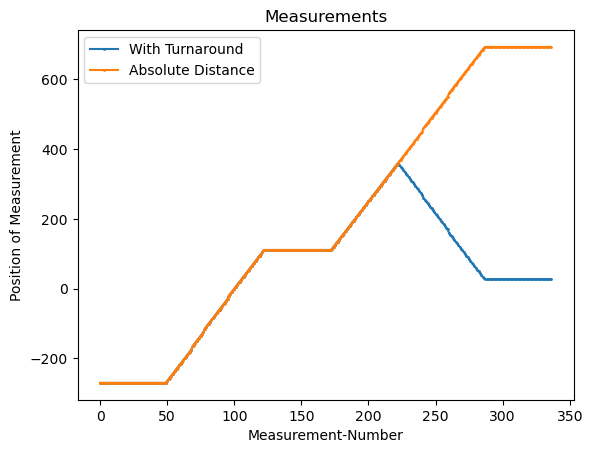

In [4]:
# MEASUREMENTS 
step_size = 5
nr = 10 # nr of meas during still standing day 

day05 = np.full(nr, -270)
day1 = day05
day15 = day05
day20 = day05
day25 = day05

day30 = np.arange(-265, -221, step_size)  
day35 = np.arange(-220, -171, step_size)  
day40 = np.arange(-165, -120, step_size)  
day45 = np.arange(-115, -26, step_size)  
day50 = np.arange(-20, 26, step_size)  
day55 = np.arange(30, 66, step_size)    
day60 = np.arange(70, 111, step_size)     

day65 = np.full(nr, 111)
day70 = day65
day75 = day65
day80 = day65
day85 = day65

day90 = np.arange(115, 161, 5)  
day95 = np.arange(165, 261, 5)   
day100 = np.arange(265, 356, 5)   
day105 = np.arange(360, 455, 5)   
day110 = np.arange(460, 555, 5)  
day115 = np.arange(560, 651, 5) 
day120 = np.arange(655, 691, 5)

day125 = np.full(nr, 693)
day130 = day125
day135 = day125
day140 = day125
day145 = day125

x_abs = np.concatenate([
    day05, day1, day15, day20, day25,
    day30, day35, day40, day45, day50, day55, day60,
    day65, day70, day75, day80, day85,
    day90, day95, day100, day105, day110, day115, day120,
    day125, day130, day135, day140, day145
])

nr_of_meas = np.array([
    len(day05), len(day1), len(day15), len(day20), len(day25),
    len(day30), len(day35), len(day40), len(day45), len(day50), len(day55), len(day60),
    len(day65), len(day70), len(day75), len(day80), len(day85),
    len(day90), len(day95), len(day100), len(day105), len(day110), len(day115), len(day120),
    len(day125), len(day130), len(day135), len(day140), len(day145)
])
nr_of_meas_each_day = np.cumsum(nr_of_meas)
meas_idx = np.arange(len(x_abs))


x_rel = x_abs.copy()
mask = x_rel > 360
x_rel[mask] = 720 - x_rel[mask]


plt.figure()
plt.title("Measurements")
plt.plot( x_rel, label = "With Turnaround", marker='o', markersize = 1)
plt.plot(x_abs, label = "Absolute Distance", marker='o', markersize = 1)
plt.xlabel("Measurement-Number")
plt.ylabel("Position of Measurement")
plt.legend()




In [5]:
# MODEL
filepath = f"Data/Simulation2_Results.csv"

# Read header lines first
header_lines = []
with open(filepath, "r") as f:
    for line in f:
        if line.strip() == "":
            break  # Stop at the first blank line
        header_lines.append(line.strip())

# Display header
print("Header Info:")
for line in header_lines:
    print(line)

# Now read the DataFrame part, skipping the header lines and blank line
df = pd.read_csv(filepath, skiprows=len(header_lines) + 1)

model_cols = [col for col in df.columns if col.startswith("gcorr_R")]
models_array = df[model_cols].values 
x = df['Position x']

# Show the top of the DataFrame
print("\nDataFrame Preview:")
print(df.head())


rad_min = 50
rad_max = 300
rad_step = 5

dep_min = 25
dep_max = 55
dep_step = 1

radii = np.arange(rad_min, rad_max, rad_step)
depths = np.arange(dep_min, dep_max, dep_step)

r_ref = 175
d_ref = 40

ref_col = f'gcorr_R{r_ref}_D{d_ref}'

if ref_col not in df.columns:
    print(f"Missing column: {ref_col}, calculating model ...")
    x_ref, gfinal_ref, gcorr_ref, model_ref = LavaTubeGravimetry(tube_radius = r_ref, tube_depth = d_ref, regolith_thickness = 0)
else:
    gcorr_ref = df[ref_col].values

Header Info:
Simulation 2 Results
Run Date: {date}
Parameters: R from 50 to 300 with stepsize 5, d from 25 to 55 with stepsize 1
Reference: R = 200, d = 110

DataFrame Preview:
   Position x  gcorr_Reference [mGal]  gcorr_R50_D25  gcorr_R50_D26  \
0    -1338.75               32.046388      32.108113      32.108098   
1    -1333.75               32.080355      32.142074      32.142058   
2    -1328.75               32.111315      32.173029      32.173014   
3    -1323.75               32.139409      32.201121      32.201105   
4    -1318.75               32.164772      32.226484      32.226468   

   gcorr_R50_D27  gcorr_R50_D28  gcorr_R50_D29  gcorr_R50_D30  gcorr_R50_D31  \
0      32.108082      32.108067      32.108052      32.108037      32.108022   
1      32.142043      32.142027      32.142012      32.141997      32.141981   
2      32.172998      32.172983      32.172967      32.172951      32.172936   
3      32.201090      32.201074      32.201058      32.201042      32.201027

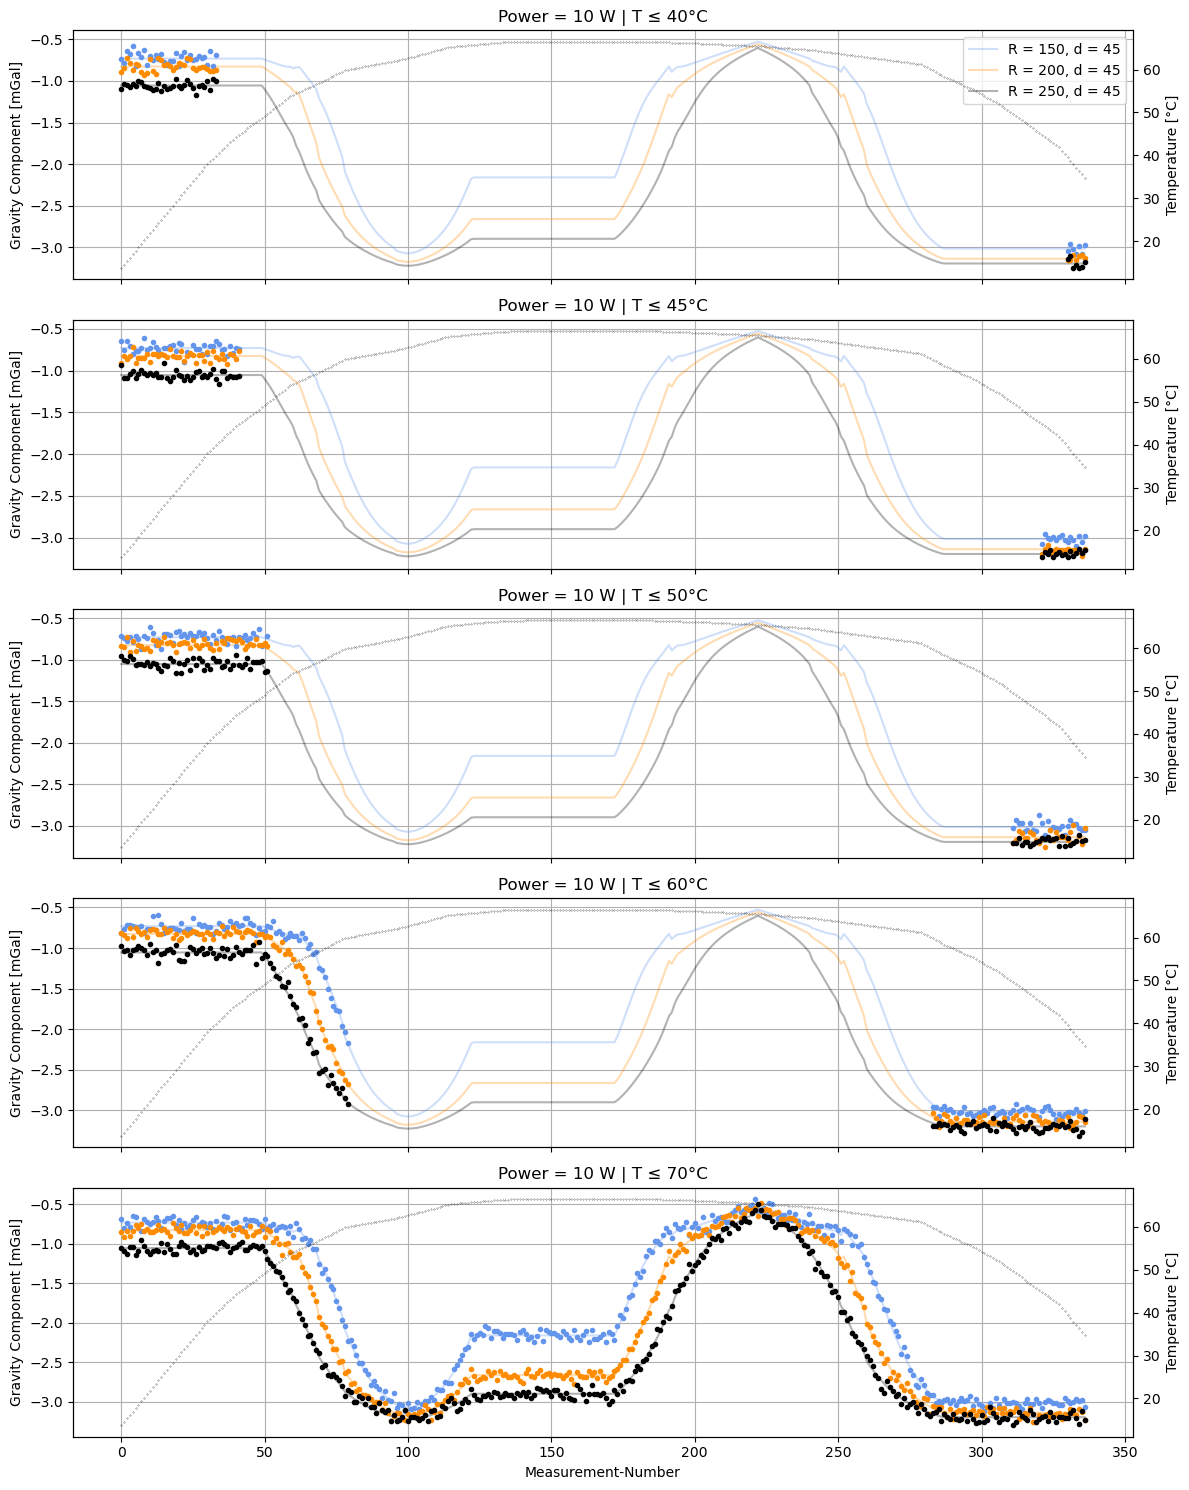

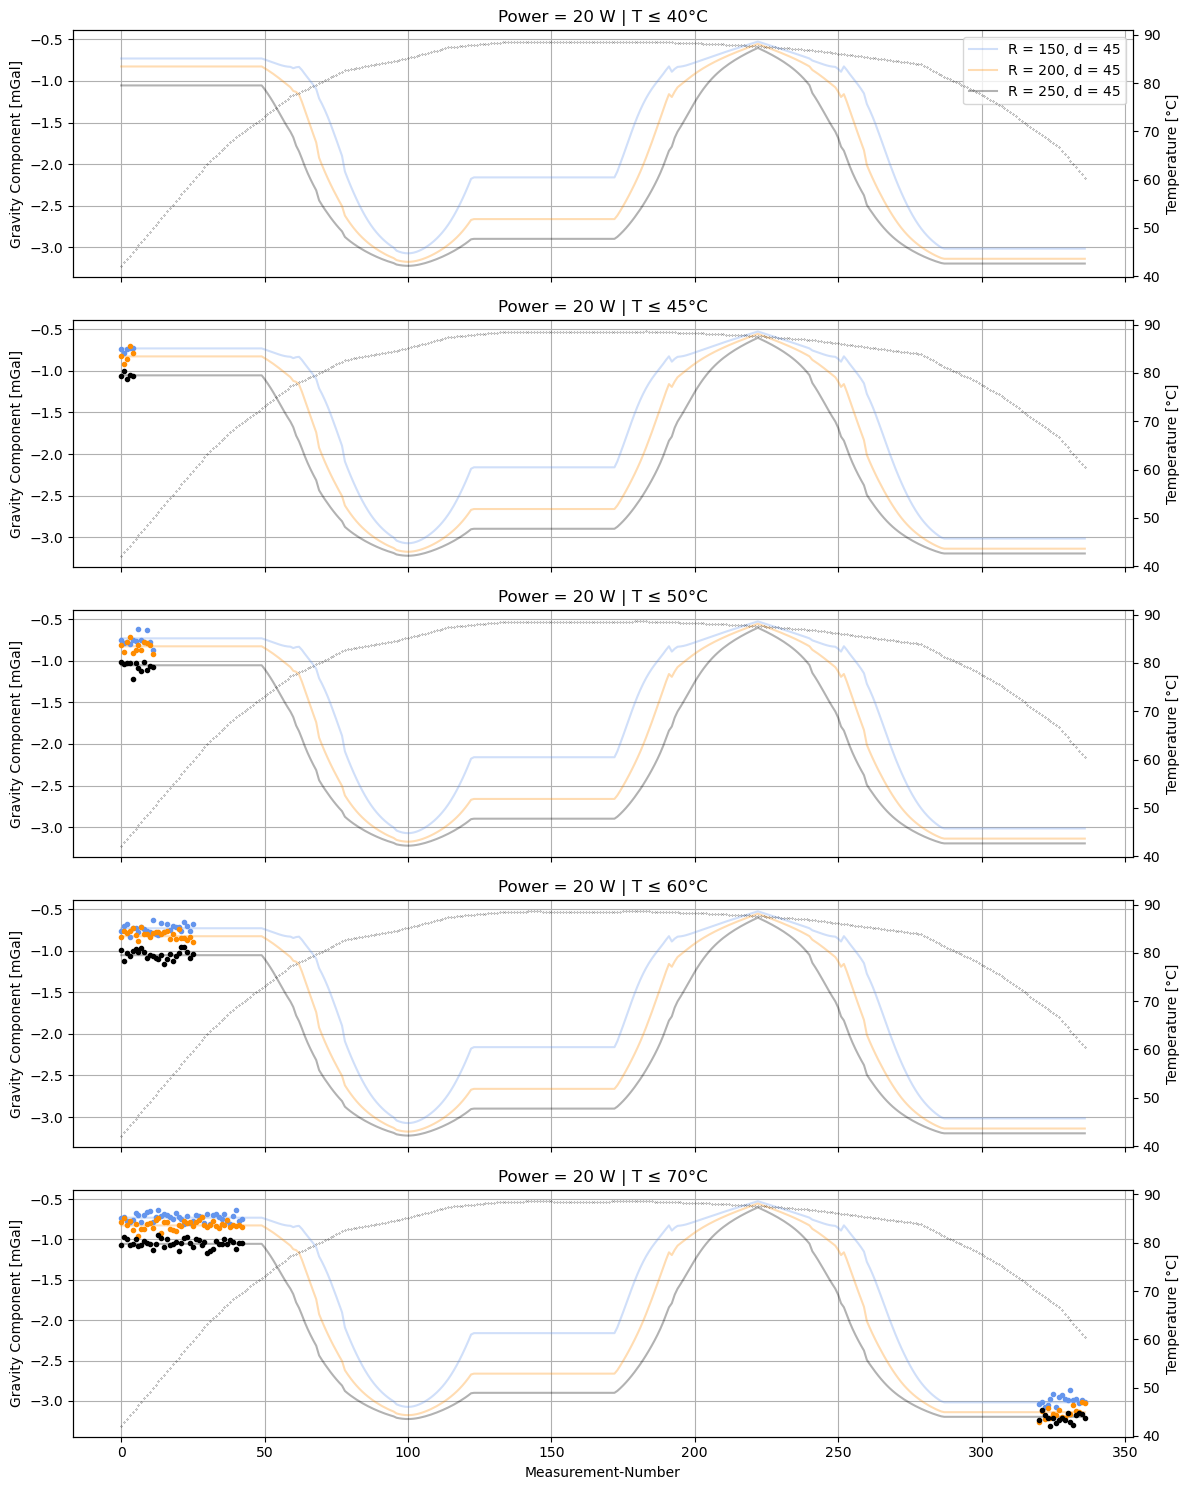

In [6]:
# CONOPS PLOT
df2 = pd.read_csv("Data/DifferentRadii.csv", header=0, delimiter=",", quotechar='"')
idx_600 = np.argmin(np.abs(x - 600))
idx_m600 = np.argmin(np.abs(x + 600))


label2g = 'Simulation 3 gcorr [R = 150m, d = 45m, Regolith = 2m]'
gcorr1 = df2[label2g].values

value_at_600 = (gcorr1[idx_600] + gcorr1[idx_m600])/2
detrended1 = gcorr1 - value_at_600

label4g = 'Simulation 4 gcorr [R = 200m, d = 45m, Regolith = 2m]'
gcorr2 = df2[label4g].values

value_at_600 = (gcorr2[idx_600] + gcorr2[idx_m600])/2
detrended2 = gcorr2 - value_at_600

label5g = 'Simulation 5 gcorr [R = 250m, d = 45m, Regolith = 2m]'
gcorr3 = detrend(df2[label5g].values)

value_at_600 = (gcorr3[idx_600] + gcorr3[idx_m600])/2
detrended3 = gcorr3 - value_at_600



f = interp1d(x, detrended1, kind = 'linear', fill_value='extrapolate')
signal1_interp = f(x_rel)

g = interp1d(x, detrended2, kind = 'linear', fill_value='extrapolate')
signal2_interp = g(x_rel)

h = interp1d(x, detrended3, kind = 'linear', fill_value='extrapolate')
signal3_interp = h(x_rel)   



interpolated_temperatures = []
for i, temp in enumerate(temperatures):
    interp_func = interp1d(nr_of_meas_each_day, temp, kind='linear', fill_value='extrapolate')
    temp_interp = interp_func(meas_idx)
    interpolated_temperatures.append(temp_interp)

interpolated_temperatures = np.array(interpolated_temperatures)



def temp_plot(temp_limits, pow_idx, xarray, temp_array, sig1, sig2, sig3):

    fig, axs = plt.subplots(len(temp_limits), 1, figsize=(12, 3 * len(temp_limits)), sharex=True)

    for idx, temp_limit in enumerate(temp_limits):
        indices = np.where(temp_array[pow_idx] <= temp_limit)[0]

        measurement1 = sig1[indices] + np.random.randn(sig1[indices].shape[0]) * 0.05
        measurement2 = sig2[indices] + np.random.randn(sig2[indices].shape[0]) * 0.05
        measurement3 = sig3[indices] + np.random.randn(sig3[indices].shape[0]) * 0.05
        points = xarray[indices]

        ax = axs[idx]
        ax.plot(xarray, sig1, label="R = 150, d = 45", color='cornflowerblue',alpha=0.3)
        ax.plot(xarray, sig2, label="R = 200, d = 45", color='darkorange',alpha=0.3)
        ax.plot(xarray, sig3, label="R = 250, d = 45", color='black',alpha=0.3)

        ax.plot(points, measurement1, marker='o', linestyle='None', markersize=3, label = None, color='cornflowerblue')
        ax.plot(points, measurement2, marker='o', linestyle='None', markersize=3, label=None, color='darkorange')
        ax.plot(points, measurement3, marker='o', linestyle='None', markersize=3, label=None, color='black')

        ax.set_title(f"Power = {power[pow_idx]} W | T ≤ {temp_limit}°C")
        ax.set_ylabel("Gravity Component [mGal]")
        ax.grid(True)

        ax2 = ax.twinx()
        ax2.plot(xarray, temp_array[pow_idx], 'ko', label="Temperature [°C]", markersize = 0.2)
        ax2.set_ylabel("Temperature [°C]", color='black')
        ax2.tick_params(axis='y', labelcolor='black')

        
    axs[-1].set_xlabel("Measurement-Number")
    axs[0].legend(loc="upper right")
    plt.tight_layout()
    plt.show()
    

power = np.array([0, 10, 20, 30, 40, 50])
a = temp_plot(temp_limits = [40,45,50,60,70], pow_idx = 1, xarray = meas_idx, temp_array = interpolated_temperatures, sig1 = signal1_interp, sig2 = signal2_interp, sig3= signal3_interp)
b = temp_plot(temp_limits = [40,45,50,60,70], pow_idx = 2, xarray = meas_idx, temp_array = interpolated_temperatures, sig1 = signal1_interp, sig2 = signal2_interp, sig3=signal3_interp)



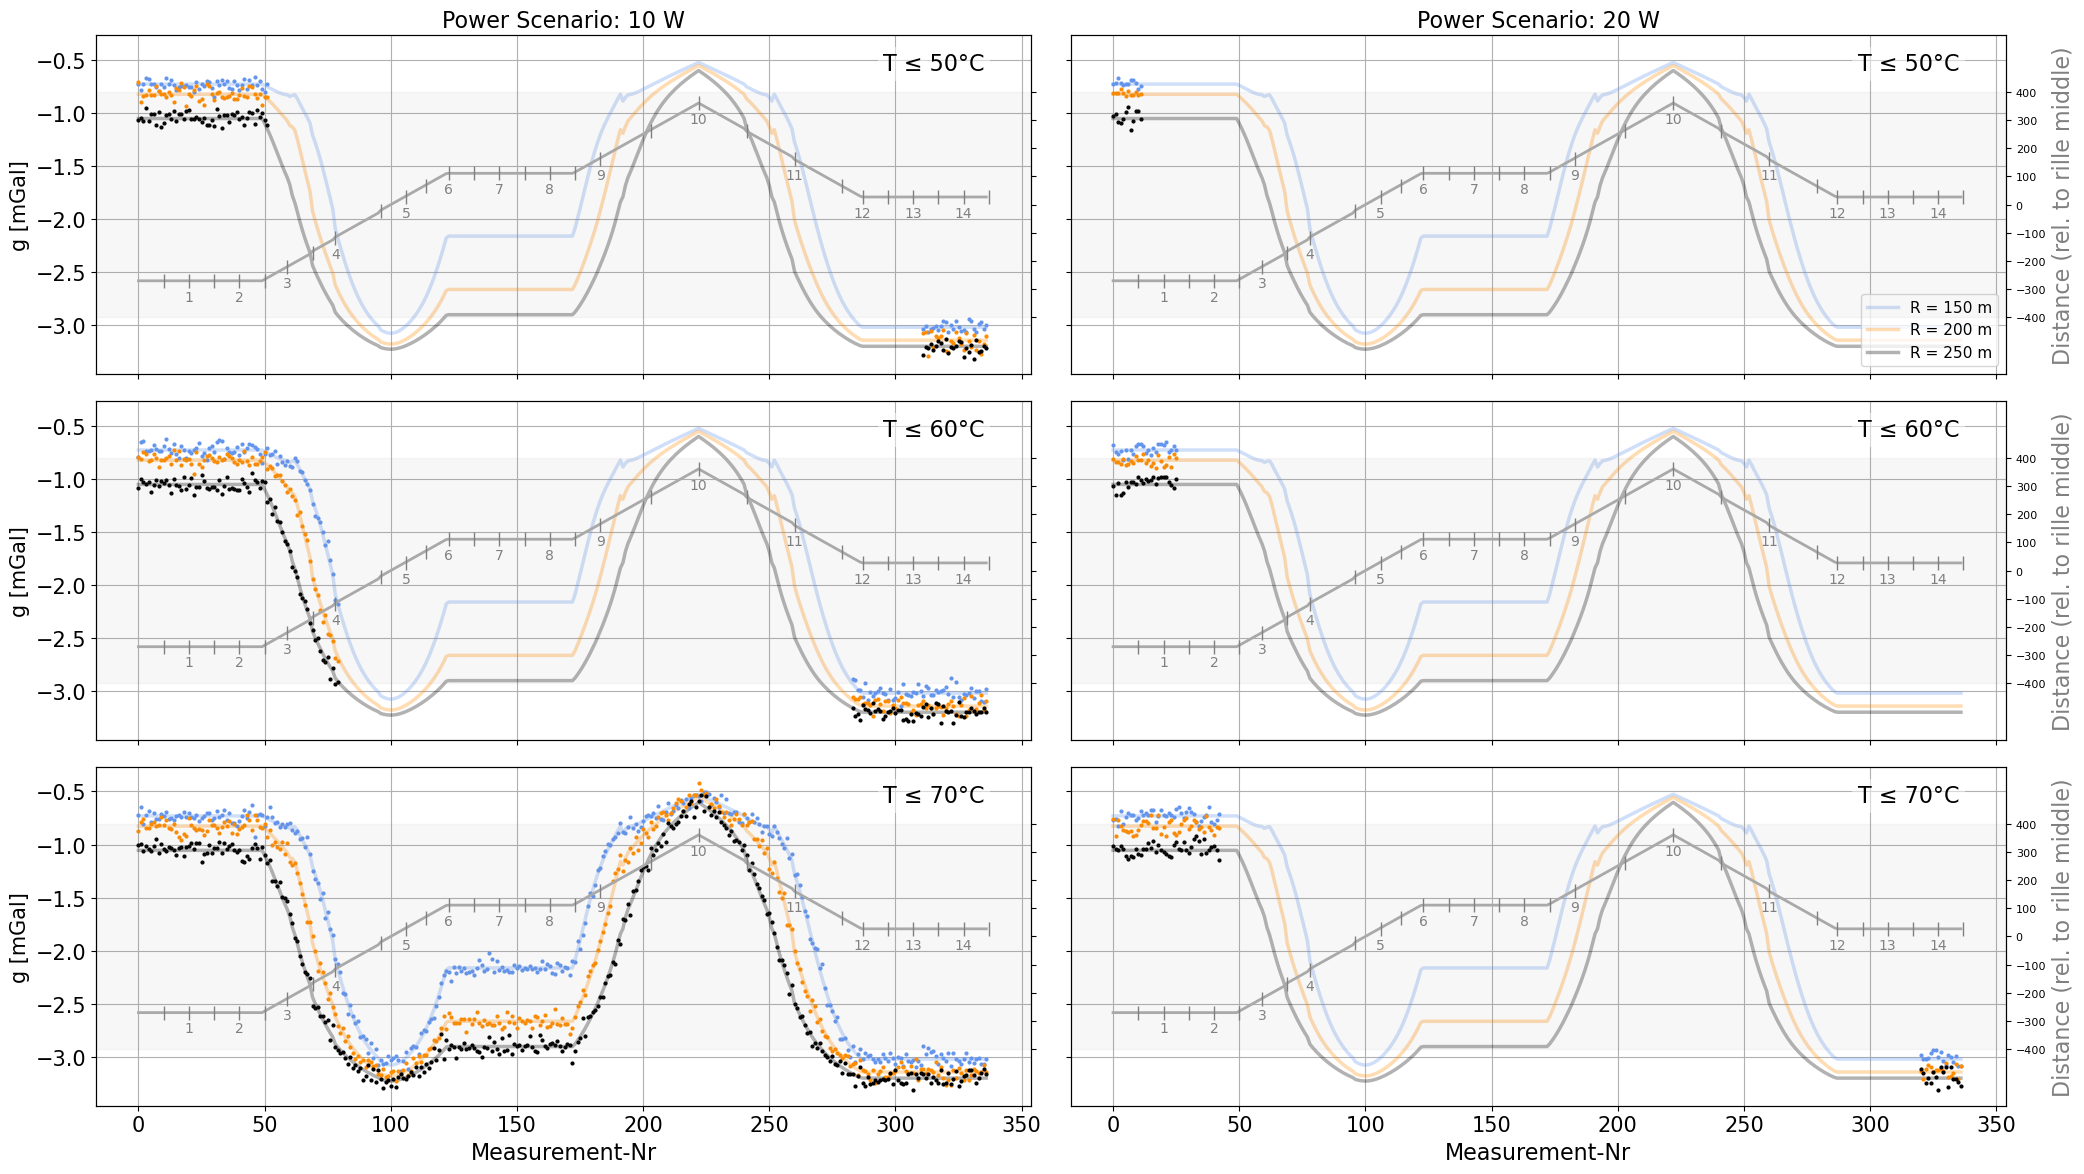

In [7]:
matching_indices = []

for val in distance_reltorillemiddle:
    # Find the index in x_rel that is closest to this value
    idx = np.argmin(np.abs(x_rel - val))
    matching_indices.append(idx)

days_new = [np.nan, 1, np.nan, 2, np.nan, 3, np.nan, 4, np.nan, 5, np.nan, 6, np.nan, 7, np.nan, 8, np.nan, 9, np.nan, 10, np.nan, 11, np.nan, 12, np.nan, 13, np.nan, 14]

plt.rcParams.update({
    "font.size": 15,            # base font size
    "axes.titlesize": 15,       # title font
    "axes.labelsize": 15,       # axis labels
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
})
def temp_plot_report(temp_limits, pow_idx, xarray, temp_array, sig1, sig2, sig3):
    fig, axs = plt.subplots(len(temp_limits), len(pow_idx),
                            figsize=(11 * len(pow_idx), 4 * len(temp_limits)),
                            sharex=True, sharey=True)

    # Ensure axs is always 2D
    if len(temp_limits) == 1:
        axs = [axs]
    if len(pow_idx) == 1:
        axs = [[ax] for ax in axs]

    for row_idx, temp_limit in enumerate(temp_limits):
        for col_idx, pow in enumerate(pow_idx):
            ax = axs[row_idx][col_idx]
            ax2 = ax.twinx()

            if col_idx == len(pow_idx) - 1: 
                ax2.set_ylabel("Distance (rel. to rille middle)", fontsize=16, color = 'gray')

            ax2.tick_params(axis='y', labelsize=8)
            ax2.plot(meas_idx, x_rel, linewidth = 2, color='darkgray', label="Distance (rel. to rille middle)")
            ax2.plot(nr_of_meas_each_day, distance_reltorillemiddle, '|', color='gray', markersize = 10)
            ax2.axhspan(-400, 400, color='gray', alpha=0.06, zorder=0)

            ax2.set_ylim(-600,600)
            ax2.set_yticks(np.arange(-400, 401, 100))
            if col_idx != len(pow_idx) - 1:
                # ax2.set_yticks([])  
                ax2.set_yticklabels([])       
                ax2.set_ylabel("")         
                # ax2.spines['right'].set_visible(False)  
            for meas, dist, day in zip(nr_of_meas_each_day, distance_reltorillemiddle, days_new):
                if not np.isnan(day):
                    ax2.text(
                        meas,         # x-position
                        dist - 70,              # y-position slightly above the point
                        f"{day}",          # label text
                        ha='center',
                        fontsize=10,
                        color='gray'
                    )

            indices = np.where(temp_array[pow] <= temp_limit)[0]

            measurement1 = sig1[indices] + np.random.randn(len(indices)) * 0.05
            measurement2 = sig2[indices] + np.random.randn(len(indices)) * 0.05
            measurement3 = sig3[indices] + np.random.randn(len(indices)) * 0.05
            points = xarray[indices]



            ax.plot(xarray, sig1, label="R = 150 m", linewidth = 2.5, color='cornflowerblue', alpha=0.3)
            ax.plot(xarray, sig2, label="R = 200 m", linewidth = 2.5, color='darkorange', alpha=0.3)
            ax.plot(xarray, sig3, label="R = 250 m", linewidth = 2.5, color='black', alpha=0.3)

            ax.plot(points, measurement1, 'o', markersize=2, label=None, color='cornflowerblue')
            ax.plot(points, measurement2, 'o', markersize=2, label=None, color='darkorange')
            ax.plot(points, measurement3, 'o', markersize=2, label=None, color='black')

            if row_idx == 0:
                ax.set_title(f"Power Scenario: {power[pow]} W", fontsize = 16)

            if row_idx == len(temp_limits) - 1:
                ax.set_xlabel(f"Measurement-Nr", fontsize = 16)


            if col_idx == 0:
                ax.set_ylabel(f"g [mGal]")


            ax.text(0.95, 0.95, f"T ≤ {temp_limit}°C",
                    transform=ax.transAxes,
                    fontsize=16,
                    ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
            ax.grid()


    top_right_ax = axs[0][-1]  # First row, last column

    handles, labels = top_right_ax.get_legend_handles_labels()
    top_right_ax.legend(handles, labels,
                        loc='lower right',
                        fontsize=11,
                        title_fontsize=10,
                        framealpha=0.8)
    plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make space for legend
    plt.savefig(f"Outputs/ConOpsPlot{temp_limits[0]}{temp_limits[1]}.png")
    plt.show()

temp_plot_report(temp_limits = [50,60,70], pow_idx = [1,2], xarray = meas_idx, temp_array = interpolated_temperatures, sig1 = signal1_interp, sig2 = signal2_interp, sig3= signal3_interp)
# temp_plot_report(temp_limits = [40,70], pow_idx = [1,2], xarray = meas_idx, temp_array = interpolated_temperatures, sig1 = signal1_interp, sig2 = signal2_interp, sig3= signal3_interp)


In [8]:
# MISFIT MATRIX

Power = 10 W, T ≤ 50°C, Noise = 0.05: min misfit at R=175, D=37
Std dev along ellipse axes: Radius: 7.012856641126224 m, Depth: 22.15977253596792 m
Power = 10 W, T ≤ 60°C, Noise = 0.05: min misfit at R=170, D=42
Std dev along ellipse axes: Radius: 7.687222808252784 m, Depth: 18.78086104083603 m
Power = 10 W, T ≤ 70°C, Noise = 0.05: min misfit at R=180, D=40
Std dev along ellipse axes: Radius: 8.12872215060257 m, Depth: 18.56706856558417 m
Power = 20 W, T ≤ 50°C, Noise = 0.05: min misfit at R=210, D=30
Std dev along ellipse axes: Radius: 8.50629054392235 m, Depth: 22.66697215969823 m
Power = 20 W, T ≤ 60°C, Noise = 0.05: min misfit at R=165, D=39
Std dev along ellipse axes: Radius: 8.42320764154358 m, Depth: 23.375139163457458 m
Power = 20 W, T ≤ 70°C, Noise = 0.05: min misfit at R=195, D=44
Std dev along ellipse axes: Radius: 7.653349608067554 m, Depth: 21.859259647153188 m


C:\Users\yslug\AppData\Local\Temp\ipykernel_3804\770102680.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


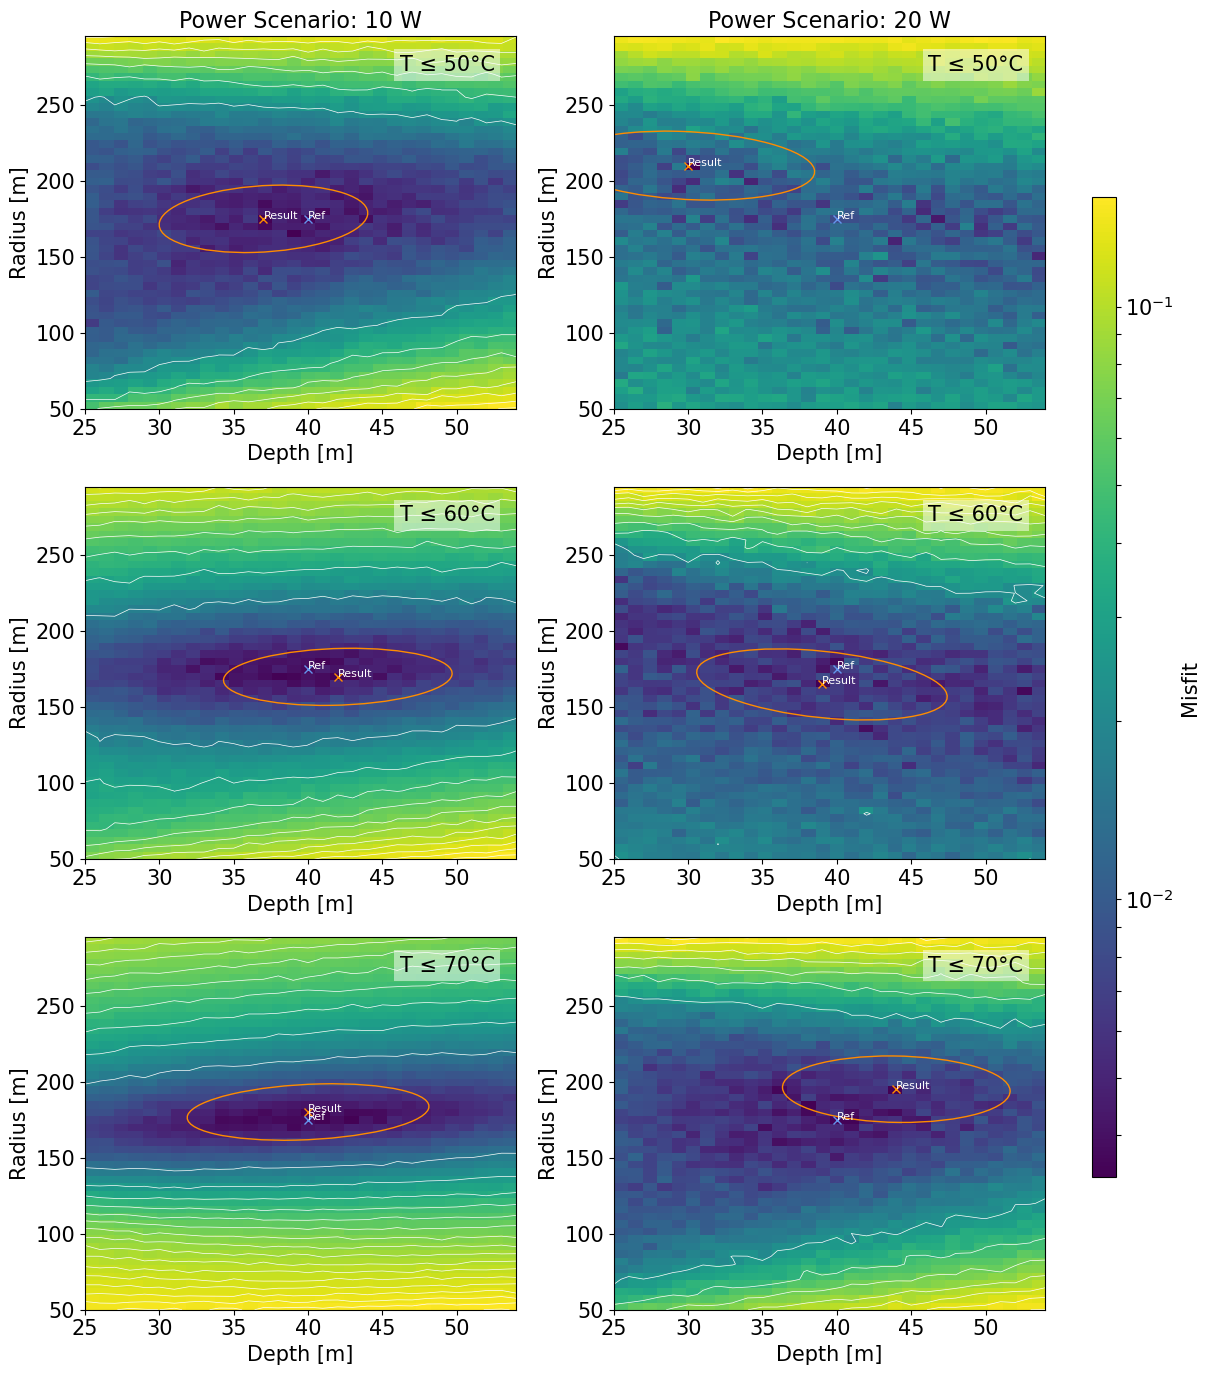

In [ ]:


def confidence_ellipse_at_point(x, y, ax, center_point, n_std=3.0, facecolor='none', weights=None, **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    cov = np.cov(x, y, aweights=weights)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x, mean_y = center_point
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)


    return ax.add_patch(ellipse), cov

def plot_misfit_temp_limited_multiple_powers(pow_idx_list, noise_std, temperature_limits):
    fig, axes = plt.subplots(len(temperature_limits),len(pow_idx_list),
                             figsize=(4 * len(temperature_limits), 7 * len(pow_idx_list)))
    if len(pow_idx_list) == 1:
        axes = np.array([axes])
    if len(temperature_limits) == 1:
        axes = axes[:, np.newaxis]

    for row_idx, power_index in enumerate(pow_idx_list):
        f_ref_interp = interp1d(x, gcorr_ref, kind='linear', fill_value='extrapolate')
        gcorr_ref_interp = f_ref_interp(x_rel)
        gcorr_ref_noisy = gcorr_ref_interp + np.random.randn(len(x_rel)) * noise_std

        for col_idx, temp_limit in enumerate(temperature_limits):
            ax = axes[col_idx, row_idx]

            indices = np.where(interpolated_temperatures[power_index] <= temp_limit)[0]
            gcorr_ref_temp = gcorr_ref_noisy[indices]
            misfit_matrix = np.zeros((len(radii), len(depths)))
            vmin, vmax = np.inf, -np.inf

            for i, r in enumerate(radii):
                for j, d in enumerate(depths):
                    col = f'gcorr_R{r}_D{d}'
                    if col not in df.columns:
                        print(f"Missing column: {col}")
                        continue
                    model = df[col].values
                    f_model_interp = interp1d(x, model, kind='linear', fill_value='extrapolate')
                    model_interp = f_model_interp(x_rel)
                    model_noisy = model_interp[indices] + np.random.randn(len(indices)) * noise_std

                    misfit = np.sum((model_noisy - gcorr_ref_temp) ** 2) / len(indices)
                    misfit_matrix[i, j] = misfit
                    vmin = min(vmin, np.min(misfit_matrix))
                    vmax = max(vmax, np.max(misfit_matrix))

            im = ax.imshow(misfit_matrix, origin='lower', aspect='auto',
                           extent=[depths[0], depths[-1], radii[0], radii[-1]],
                           norm=mcolors.LogNorm())
            xx, yy = np.meshgrid(depths, radii)
            if ax != axes[0,1]:
                ax.contour(xx, yy, misfit_matrix, levels = np.arange(np.min(misfit_matrix), np.max(misfit_matrix), 0.02), colors = "white", linewidths=0.5)
            if col_idx == 0:
                ax.set_title(f"Power Scenario: {power[power_index]} W", fontsize = 16)
           
            ax.set_xlabel("Depth [m]")
            ax.set_ylabel("Radius [m]")

            min_idx = np.unravel_index(np.argmin(misfit_matrix), misfit_matrix.shape)
            r_min = radii[min_idx[0]]
            d_min = depths[min_idx[1]]

            ax.plot(d_min, r_min, 'x', color = 'darkorange')
            ax.text(d_min, r_min, "Result", color='white', fontsize=8)

            ax.plot(d_ref, r_ref, 'x', color = 'cornflowerblue')
            ax.text(d_ref, r_ref, "Ref", color='white', fontsize=8)

            # Covariance ellipse around min misfit
            X, Y = np.meshgrid(depths, radii)
            x_flat = X.ravel()
            y_flat = Y.ravel()
            misfits_flat = misfit_matrix.ravel()

            center = (d_min, r_min)
            radius = 50
            distances = np.sqrt((x_flat - center[0]) ** 2 + (y_flat - center[1]) ** 2)
            mask = distances <= radius
            x_sub = x_flat[mask]
            y_sub = y_flat[mask]
            weights_sub = np.exp(-misfits_flat[mask] / misfits_flat[mask].std())

            ell, cov = confidence_ellipse_at_point(x_sub, y_sub, ax, center_point=center, n_std=1,
                                        edgecolor='darkorange', weights=weights_sub)
            ax.set_xlim(depths[0], depths[-1])
            ax.set_ylim(radii[0], radii[-1])
            ax.text(0.95, 0.95, f"T ≤ {temp_limit}°C",
                transform=ax.transAxes,
                ha='right', va='top',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
            
            print(f"Power = {power[power_index]} W, T ≤ {temp_limit}°C, Noise = {noise_std}: min misfit at R={r_min}, D={d_min}")
            print(f"Std dev along ellipse axes: Radius: {np.sqrt(cov[0,0])} m, Depth: {np.sqrt(cov[1,1])} m")

    
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  

    cbar = fig.colorbar(im, cax=cbar_ax, label="Misfit")
    cbar.locator = LogLocator(base=10, subs=np.arange(0, 10) * 0.1, numticks=15)
    cbar.update_ticks()
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.savefig(f"Outputs/misfit{temperature_limits[0]}{temperature_limits[1]}.png")
    plt.show()


plot_misfit_temp_limited_multiple_powers(pow_idx_list=[1, 2], noise_std=0.05,
                                         temperature_limits=[50,60,70])

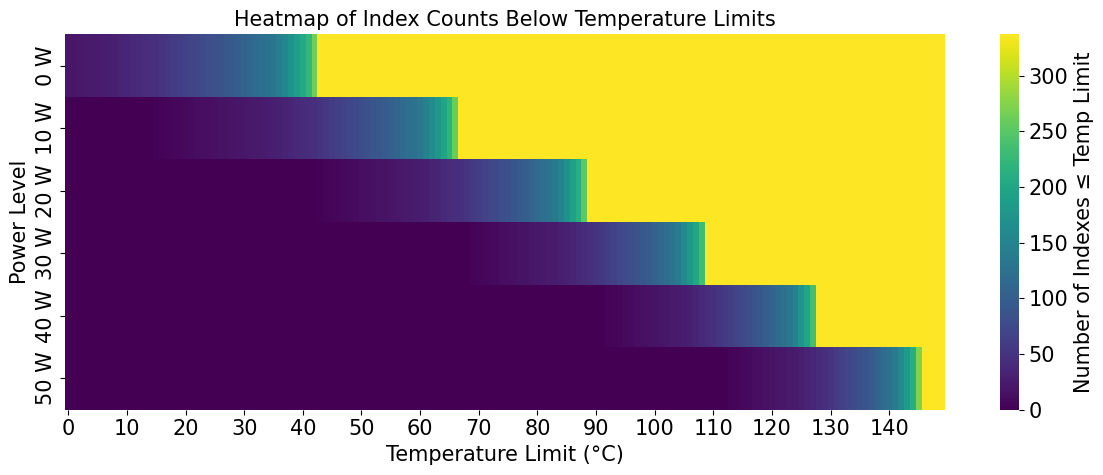

In [10]:

# Define temperature limits
temperature_limits = np.arange(0, 150, 1)

# Number of power levels (assuming 6)
num_powers = 6

# Preallocate a matrix for counts (shape: [power_index, temp_limit])
heatmap_data = np.zeros((num_powers, len(temperature_limits)))

# Fill in the matrix
for power_index in range(num_powers):
    for i, temp_limit in enumerate(temperature_limits):
        heatmap_data[power_index, i] = np.sum(interpolated_temperatures[power_index] <= temp_limit)

# Create the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(
    heatmap_data,
    cmap="viridis",  # or "plasma", "coolwarm", etc.
    xticklabels=10,  # Show every 10th temp label
    yticklabels=[f"{power[i]} W" for i in range(num_powers)],
    cbar_kws={'label': 'Number of Indexes ≤ Temp Limit'}
)

plt.xlabel("Temperature Limit (°C)")
plt.ylabel("Power Level")
plt.title("Heatmap of Index Counts Below Temperature Limits")
plt.tight_layout()
plt.show()



In [11]:


def radiusdepthforalltemps(pow_idx, noise_std, temperature_limits):

    results = {
        "temp_limits": [],
        "r_min": [],
        "d_min": [],
        "std_radius": [],
        "std_depth": []
    }

    f_ref_interp = interp1d(x, gcorr_ref, kind='linear', fill_value='extrapolate')
    gcorr_ref_interp = f_ref_interp(x_rel)
    gcorr_ref_noisy = gcorr_ref_interp + np.random.randn(len(x_rel)) * noise_std

    for row_idx, temp_limit in enumerate(temperature_limits):
        indices = np.where(interpolated_temperatures[pow_idx] <= temp_limit)[0]
        gcorr_ref_temp = gcorr_ref_noisy[indices]
        print(temp_limit, len(indices))
        misfit_matrix = np.zeros((len(radii), len(depths)))
        vmin, vmax = np.inf, -np.inf

        for i, r in enumerate(radii):
            for j, d in enumerate(depths):
                col = f'gcorr_R{r}_D{d}'
                if col not in df.columns:
                    print(f"Missing column: {col}")
                    continue
                model = df[col].values
                f_model_interp = interp1d(x, model, kind='linear', fill_value='extrapolate')
                model_interp = f_model_interp(x_rel)
                model_noisy = model_interp[indices] + np.random.randn(len(indices)) * noise_std

                misfit = np.sum((model_noisy - gcorr_ref_temp) ** 2) / len(indices)
                misfit_matrix[i, j] = misfit
                vmin = min(vmin, np.min(misfit_matrix))
                vmax = max(vmax, np.max(misfit_matrix))


        min_idx = np.unravel_index(np.argmin(misfit_matrix), misfit_matrix.shape)
        r_min = radii[min_idx[0]]
        d_min = depths[min_idx[1]]

        # Covariance ellipse around min misfit
        X, Y = np.meshgrid(depths, radii)
        x_flat = X.ravel()
        y_flat = Y.ravel()
        misfits_flat = misfit_matrix.ravel()

        center = (d_min, r_min)
        radius = 50
        distances = np.sqrt((x_flat - center[0]) ** 2 + (y_flat - center[1]) ** 2)
        mask = distances <= radius
        x_sub = x_flat[mask]
        y_sub = y_flat[mask]
        weights_sub = np.exp(-misfits_flat[mask] / misfits_flat[mask].std())

        cov = np.cov(x_sub, y_sub, aweights=weights_sub)
        std_depth = np.sqrt(cov[0, 0])
        std_radius = np.sqrt(cov[1, 1])

        if len(indices) == 0:
            results["r_min"].append(np.nan)
            results["d_min"].append(np.nan)
        else:
            results["r_min"].append(r_min)
            results["d_min"].append(d_min)
            
        results["temp_limits"].append(temp_limit)
        results["std_radius"].append(std_radius)
        results["std_depth"].append(std_depth)
        std_r = []
        std_d = []

        std_r.append(std_radius)
        std_d.append(std_depth)
    return results,std_r,std_d

results_10W, std10_r, std10_d = radiusdepthforalltemps(pow_idx=1, noise_std=0.05, temperature_limits=temperature_limits)
results_20W, std20_r, std20_d= radiusdepthforalltemps(pow_idx=2, noise_std=0.05, temperature_limits=temperature_limits)



0 0
1 0
2 0


C:\Users\yslug\AppData\Local\Temp\ipykernel_3804\920908030.py:33: RuntimeWarning: invalid value encountered in scalar divide
  misfit = np.sum((model_noisy - gcorr_ref_temp) ** 2) / len(indices)


3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 2
16 3
17 5
18 6
19 7
20 8
21 10
22 11
23 12
24 13
25 14
26 16
27 17
28 18
29 19
30 21
31 22
32 23
33 24
34 26
35 28
36 30
37 32
38 36
39 38
40 41
41 43
42 47
43 50
44 54
45 58
46 62
47 66
48 70
49 74
50 78
51 82
52 87
53 91
54 96
55 102
56 109
57 115
58 121
59 127
60 134
61 145
62 163
63 180
64 197
65 218
66 260
67 337
68 337
69 337
70 337
71 337
72 337
73 337
74 337
75 337
76 337
77 337
78 337
79 337
80 337
81 337
82 337
83 337
84 337
85 337
86 337
87 337
88 337
89 337
90 337
91 337
92 337
93 337
94 337
95 337
96 337
97 337
98 337
99 337
100 337
101 337
102 337
103 337
104 337
105 337
106 337
107 337
108 337
109 337
110 337
111 337
112 337
113 337
114 337
115 337
116 337
117 337
118 337
119 337
120 337
121 337
122 337
123 337
124 337
125 337
126 337
127 337
128 337
129 337
130 337
131 337
132 337
133 337
134 337
135 337
136 337
137 337
138 337
139 337
140 337
141 337
142 337
143 337
144 337
145 337
146 337
147 337
148 337
149 33

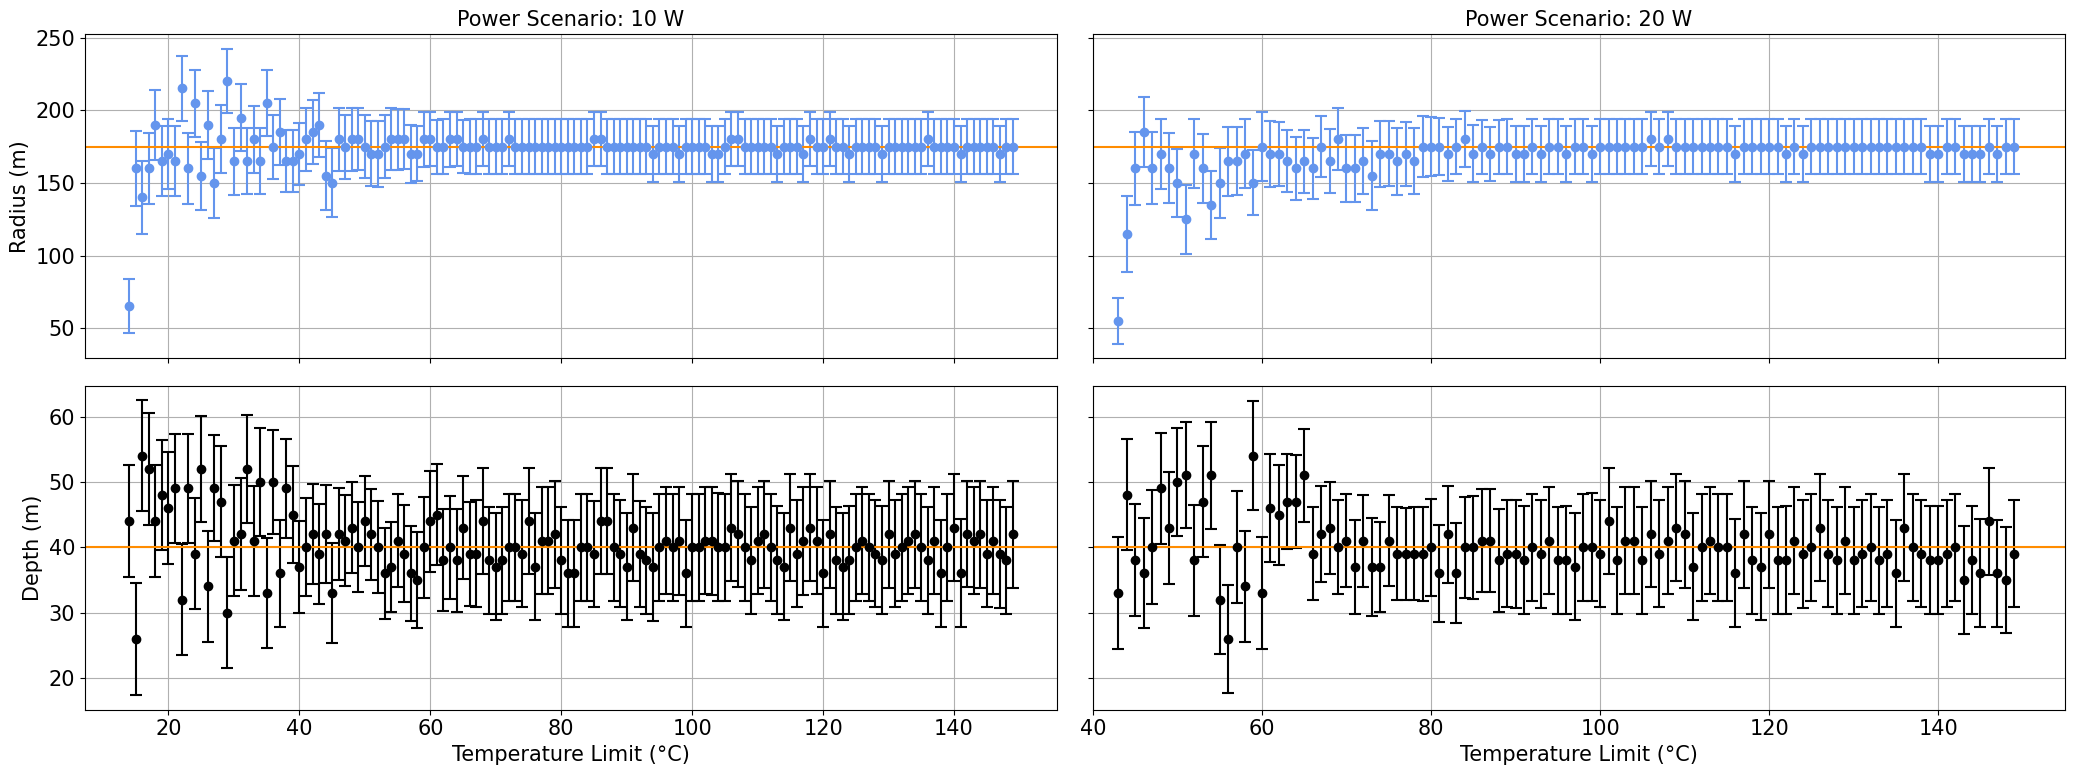

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(21, 8), sharex='col', sharey='row')

mask_10W = ~np.isnan(results_10W["r_min"])
x_vals_10W = np.array(results_10W["temp_limits"])[mask_10W]


mask_20W = ~np.isnan(results_20W["r_min"])
x_vals_20W = np.array(results_20W["temp_limits"])[mask_20W]

# RADIUS (top)
axes[0, 0].errorbar(results_10W["temp_limits"], results_10W["r_min"], yerr=results_10W["std_radius"], fmt='o', color = 'cornflowerblue',
    capsize=4,     
    capthick=1.5,    
    elinewidth=1.5)
# axes[0, 0].errorbar(results_10W_01["temp_limits"], results_10W_01["r_min"], yerr=results_10W_01["std_radius"], fmt='-o', label = "Noise: 0.1 mGal")
axes[0, 0].set_ylabel("Radius (m)")
axes[0, 0].set_title("Power Scenario: 10 W")
axes[0,0].axhline(y=r_ref, color='darkorange', linestyle='-', label='Reference Radius')
# axes[0, 0].set_xlim(x_vals_10W.min()-5, x_vals_10W.max()+5)

axes[0, 1].errorbar(results_20W["temp_limits"], results_20W["r_min"], yerr=results_20W["std_radius"], fmt='o',color = 'cornflowerblue',
    capsize=4,     
    capthick=1.5,    
    elinewidth=1.5)
# axes[0, 1].errorbar(results_20W_01["temp_limits"], results_20W_01["r_min"], yerr=results_20W_01["std_radius"], fmt='-o',label = "Noise: 0.1 mGal")
axes[0, 1].set_title("Power Scenario: 20 W")
axes[0,1].axhline(y=r_ref, color='darkorange', linestyle='-', label='Reference Radius')
axes[0, 1].set_xlim(40, 150)


# DEPTH (bottom)

axes[1, 0].errorbar(results_10W["temp_limits"], results_10W["d_min"], yerr=results_10W["std_depth"], fmt='ko',
    capsize=4,     
    capthick=1.5,    
    elinewidth=1.5)
# axes[1, 0].errorbar(results_10W_01["temp_limits"], results_10W_01["d_min"], yerr=results_10W_01["std_radius"], fmt='-o', label = "Noise: 0.1 mGal")
axes[1, 0].set_ylabel("Depth (m)")
axes[1, 0].set_xlabel("Temperature Limit (°C)")
axes[1,0].axhline(y=d_ref, color='darkorange', linestyle='-', label='Reference Depth')

axes[1, 1].errorbar(results_20W["temp_limits"], results_20W["d_min"], yerr=results_20W["std_depth"], fmt='ko',
    capsize=4,     
    capthick=1.5,    
    elinewidth=1.5)
# axes[1, 1].errorbar(results_20W_01["temp_limits"], results_20W_01["d_min"], yerr=results_20W_01["std_radius"], fmt='-o', label = "Noise: 0.1 mGal")
axes[1, 1].set_xlabel("Temperature Limit (°C)")
axes[1,1].axhline(y=d_ref, color='darkorange', linestyle='-', label='Reference Depth')
axes[1, 1].set_xlim(40, 155)


for ax in axes.flat:
    ax.grid()

plt.tight_layout()
plt.savefig("Outputs/Characterisation.png")
plt.show()
